In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tc_prep = pd.read_csv('tc_prep.csv')

In [4]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Family,1.00,1.0000,0.000,1.0,0.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00


In [5]:
scaler = StandardScaler()
tc_prep['Fare'] = scaler.fit_transform(tc_prep['Fare'].to_numpy().reshape(-1, 1))

In [6]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.000000,1.000000,1.000000,1.00000,0.000000
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Family,1.000000,1.000000,0.000000,1.00000,0.000000
Sex_female,0.000000,1.000000,1.000000,1.00000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.00000,1.000000
Embarked_C,0.000000,1.000000,0.000000,0.00000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.00000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.00000,1.000000
Pclass_1,0.000000,1.000000,0.000000,1.00000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.00000,0.000000


In [7]:
X_train, X_val_test = train_test_split(tc_prep, test_size=0.4, random_state=0)
X_val, X_test = train_test_split(X_val_test, test_size=0.5, random_state=0 )

y_train = X_train['Survived']
y_test = X_test['Survived']
y_val = X_val['Survived']

del X_train['Survived']
del X_test['Survived']
del X_val['Survived']

best accuracy score = 0.801
best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
accuracy = 0.816
f1_score = 0.708
roc_auc_score = 0.776


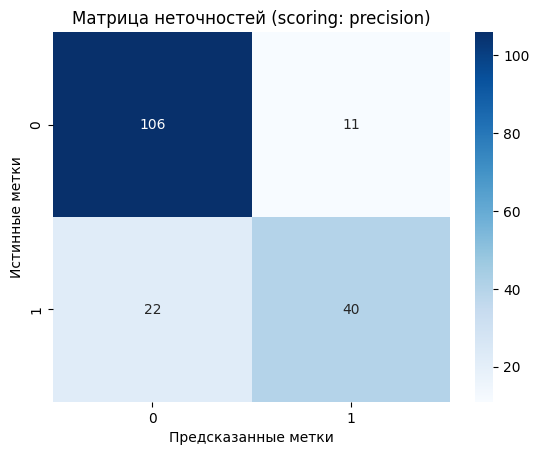

In [10]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knna_accuracy = clf.score(X_test, y_test)
knna_f1_score = f1_score(y_test, y_pred)
knna_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knna_accuracy:.3f}')
print(f'f1_score = {knna_f1_score:.3f}')
print(f'roc_auc_score = {knna_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best precision score = 0.844
best params: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
accuracy = 0.810
f1_score = 0.679
roc_auc_score = 0.756


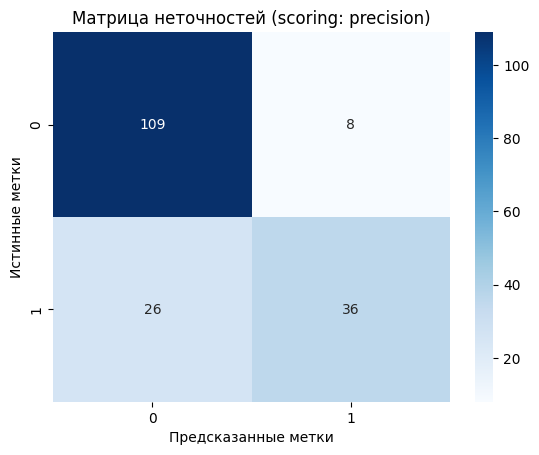

In [11]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knnp_accuracy = clf.score(X_test, y_test)
knnp_f1_score = f1_score(y_test, y_pred)
knnp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knnp_accuracy:.3f}')
print(f'f1_score = {knnp_f1_score:.3f}')
print(f'roc_auc_score = {knnp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.685
best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
accuracy = 0.810
f1_score = 0.726
roc_auc_score = 0.790


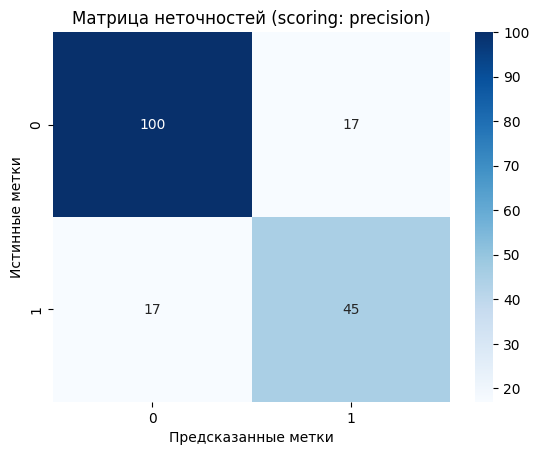

In [12]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knnr_accuracy = clf.score(X_test, y_test)
knnr_f1_score = f1_score(y_test, y_pred)
knnr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knnr_accuracy:.3f}')
print(f'f1_score = {knnr_f1_score:.3f}')
print(f'roc_auc_score = {knnr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

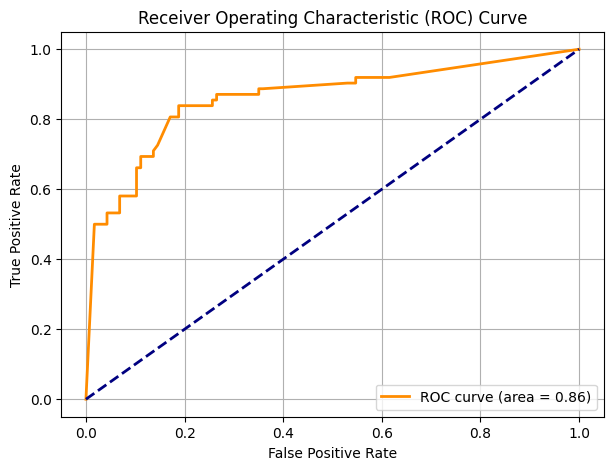

In [25]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

(0.775, 0.82)

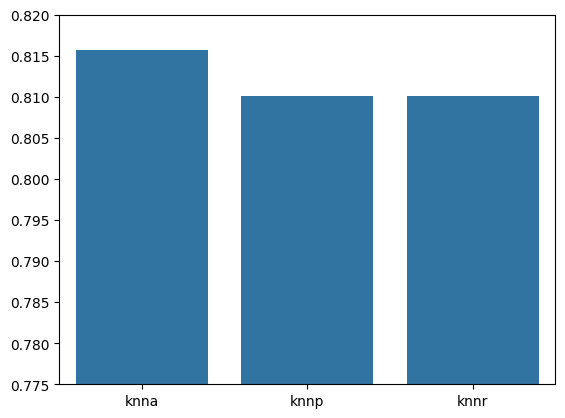

In [18]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_accuracy, knnp_accuracy, knnr_accuracy])
plt.ylim(0.775, 0.82)

(0.6, 0.75)

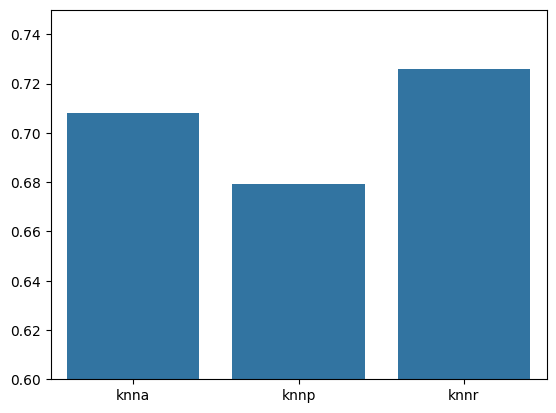

In [21]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_f1_score, knnp_f1_score, knnr_f1_score])
plt.ylim(0.6, 0.75)

(0.7, 0.82)

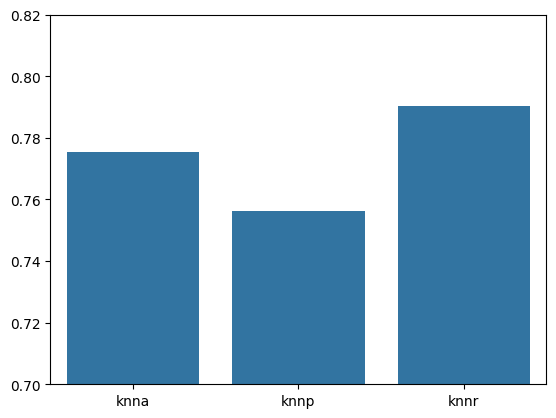

In [24]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_roc, knnp_roc, knnr_roc])
plt.ylim(0.7, 0.82)